
# Lasso model selection via information criteria

This example reproduces the example of Fig. 2 of [ZHT2007](#ZHT2007). A
:class:`~sklearn.linear_model.LassoLarsIC` estimator is fit on a
diabetes dataset and the AIC and the BIC criteria are used to select
the best model.

<div class="alert alert-info"><h4>Note</h4><p>
    
It is important to note that the optimization to find `alpha` with
:class:`~sklearn.linear_model.LassoLarsIC` relies on the AIC or BIC
criteria that are computed in-sample, thus on the training set directly.
This approach differs from the cross-validation procedure. For a comparison
of the two approaches, you can refer to the following example:
[Lasso model selection: AIC-BIC / cross-validation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py).</p></div>

**References**

<a id='ZHT2007'></a>
`[ZHT2007]` [Zou, Hui, Trevor Hastie, and Robert Tibshirani.
    "On the degrees of freedom of the lasso."
    The Annals of Statistics 35.5 (2007): 2173-2192](https://arxiv.org/abs/0712.0881)

In [ ]:
# Author: Alexandre Gramfort
#         Guillaume Lemaitre
# License: BSD 3 clause

We will use the diabetes dataset.



In [1]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
n_samples = X.shape[0]
X.head()

C:\Program Files\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Scikit-learn provides an estimator called
:class:`~sklearn.linear_model.LassoLarsIC` that uses either Akaike's
information criterion (AIC) or the Bayesian information criterion (BIC) to
select the best model. Before fitting
this model, we will scale the dataset.

In the following, we are going to fit two models to compare the values
reported by AIC and BIC.



In [2]:
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


To be in line with the definition in [ZHT2007](#ZHT2007), we need to rescale the
AIC and the BIC. Indeed, Zou et al. are ignoring some constant terms
compared to the original definition of AIC derived from the maximum
log-likelihood of a linear model. You can refer to
[mathematical detail section for the User Guide](https://scikit-learn.org/stable/modules/linear_model.html#lasso-lars-ic).



In [3]:
def zou_et_al_criterion_rescaling(criterion, n_samples, noise_variance):
    """Rescale the information criterion to follow the definition of Zou et al."""
    return criterion - n_samples * np.log(2 * np.pi * noise_variance) - n_samples

In [4]:
import numpy as np

aic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_aic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

In [5]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)

bic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_bic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Now that we collected the AIC and BIC, we can as well check that the minima
of both criteria happen at the same alpha. Then, we can simplify the
following plot.



In [6]:
index_alpha_path_aic == index_alpha_path_bic

True

Finally, we can plot the AIC and BIC criterion and the subsequent selected
regularization parameter.



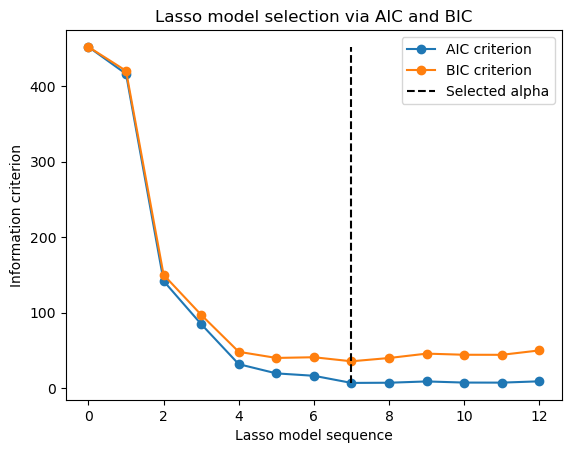

In [7]:
import matplotlib.pyplot as plt

plt.plot(aic_criterion, color="tab:blue", marker="o", label="AIC criterion")
plt.plot(bic_criterion, color="tab:orange", marker="o", label="BIC criterion")
plt.vlines(
    index_alpha_path_bic,
    aic_criterion.min(),
    aic_criterion.max(),
    color="black",
    linestyle="--",
    label="Selected alpha",
)
plt.legend()
plt.ylabel("Information criterion")
plt.xlabel("Lasso model sequence")
_ = plt.title("Lasso model selection via AIC and BIC")